In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
## IMPORTANDO OS DADOS E CONVERTENDO PARA TABELA
df = pd.read_csv('dados.csv')
df

,QUANTIDADE
0,C
1,D
2,D
3,E
4,C
...,...
195,B
196,D
197,D
198,D


In [8]:
##RENOMEIA E REDEFINE AS LEGENDAS
df['QUANTIDADE'] = df['QUANTIDADE'].map({'A':'Defeito na cobertura plástica',
                             'B':'Defeito no teclado',
                             'C':'Defeito na fonte de energia',
                             'D':'Soldas soltas',
                             'E':'Defeito na placa da unidade de processamento',
                             'F':'Defeito no visor',
                             'G':'Outros',})
df

,QUANTIDADE
0,Defeito na fonte de energia
1,Soldas soltas
2,Soldas soltas
3,Defeito na placa da unidade de processamento
4,Defeito na fonte de energia
...,...
195,Defeito no teclado
196,Soldas soltas
197,Soldas soltas
198,Soldas soltas


In [9]:
##CONTANDO OS VALORES DE CADA INSTÂNCIA
frec = pd.value_counts(df['QUANTIDADE'])
frec

Soldas soltas                                   80
Defeito na fonte de energia                     55
Defeito na placa da unidade de processamento    25
Defeito no teclado                              20
Defeito na cobertura plástica                   10
Outros                                           7
Defeito no visor                                 3
Name: QUANTIDADE, dtype: int64

In [10]:
##TRANSFORMANDO EM UM DATAFRAME
frecDf = pd.DataFrame(frec)
frecDf

,QUANTIDADE
Soldas soltas,80
Defeito na fonte de energia,55
Defeito na placa da unidade de processamento,25
Defeito no teclado,20
Defeito na cobertura plástica,10
Outros,7
Defeito no visor,3


In [11]:
##ACRESCENTANDO A COLUNA DE FREQUENCIA RELATIVA
frecDf["FREQUENCIA REL (%)"] = frecDf["QUANTIDADE"]/len(df) * 100
frecDf

,QUANTIDADE,FREQUENCIA REL (%)
Soldas soltas,80,40.0
Defeito na fonte de energia,55,27.5
Defeito na placa da unidade de processamento,25,12.5
Defeito no teclado,20,10.0
Defeito na cobertura plástica,10,5.0
Outros,7,3.5
Defeito no visor,3,1.5


In [12]:
##ACRESCENTANDO A FREQUENCIA ACUMULADA
frecDf["ACUMULADO (%)"] = frecDf["FREQUENCIA REL (%)"].cumsum()
frecDf

,QUANTIDADE,FREQUENCIA REL (%),ACUMULADO (%)
Soldas soltas,80,40.0,40.0
Defeito na fonte de energia,55,27.5,67.5
Defeito na placa da unidade de processamento,25,12.5,80.0
Defeito no teclado,20,10.0,90.0
Defeito na cobertura plástica,10,5.0,95.0
Outros,7,3.5,98.5
Defeito no visor,3,1.5,100.0


In [105]:
##frecDf.to_csv('tabela1.csv')

In [13]:
xLabel = input('Digite a legenda: ')

/tmp/ipykernel_9558/980236271.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(frecDf["QUANTIDADE"], rotation=90, color="C3")##cor dos valores do eixo x


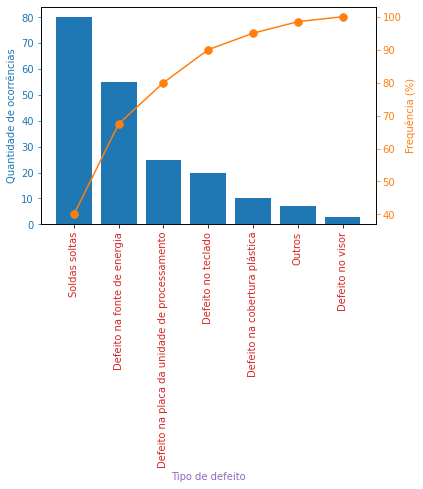

In [16]:
fig, ax1 = plt.subplots()
ax1.bar(frecDf.index, frecDf["QUANTIDADE"], color="C0")
ax1.set_ylabel("Quantidade de ocorrências", color="C0")
ax1.tick_params(axis="y", colors="C0")##cor dos numeros do eixo y
ax1.set_xlabel(xLabel, color="C4")##cor do input da label
ax1.set_xticklabels(frecDf["QUANTIDADE"], rotation=90, color="C3")##cor dos valores do eixo x
ax2 = ax1.twinx()
ax2.plot(frecDf.index, frecDf["ACUMULADO (%)"], color="C1", marker=".", ms=15)
ax2.tick_params(axis="y", colors="C1")
ax2.set_ylabel("Frequência (%)", color="C1")
plt.show()